In [1]:
import sys
sys.path.append("..")
from tqdm.notebook import tqdm
import numpy as np
from mango.environments import frozen_lake
import utils_plot, utils_save, utils_sim

In [2]:
# parameters for the environment
map_scale = 2
p_frozen = None
use_mango = True

# parameters for the training
N_episodes = 1000
train_steps_per_episode = 5
episode_length = 4**map_scale

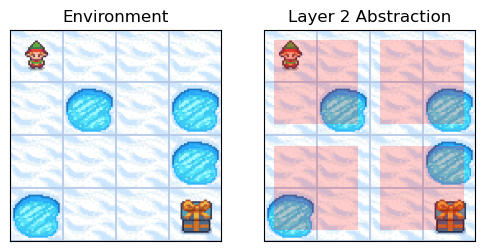

In [3]:
# create the environment and the option manager
dir_path = utils_save.path_to_save_dir(map_scale, p_frozen)
env = utils_sim.make_env(map_scale, p_frozen, start_anywhere=True)
mango_agent = utils_sim.make_mango_agent(env, map_scale)
frozen_lake.plot_utils.plot_all_abstractions(mango_agent)

In [4]:
# train loop
for layer in mango_agent.abstract_layers:
    layer.set_randomness(1.0)
for i, layer in enumerate(mango_agent.abstract_layers, start=1):
    for iteration, randomness in enumerate(tqdm(np.linspace(1, 0, N_episodes))):
        randomness = 0.0 if iteration % 2 else randomness
        layer.set_randomness(randomness)
        reward, info = mango_agent.run_episode(randomness=1.0, episode_length=episode_length)
        for _ in range(train_steps_per_episode):
            layer.train()
# for iteration, randomness in enumerate(tqdm(np.linspace(1, 0, N_episodes))):
#     randomness = 0.0 if iteration % 2 else randomness
#     reward, info = mango_agent.run_episode(randomness, episode_length)
#     for _ in range(train_steps_per_episode):
#         mango_agent.train()


  0%|          | 0/1000 [00:00<?, ?it/s]

len(trajectory)=1
    action=1
        lower_action=1
        lower_action=2
len(trajectory)=1
    action=3
        lower_action=2
        lower_action=4
len(trajectory)=2
    action=0
        lower_action=2
len(trajectory)=3
    action=2
        lower_action=2
        lower_action=2
        lower_action=2
        lower_action=2
        lower_action=2
        lower_action=2
        lower_action=2
        lower_action=2
        lower_action=2
        lower_action=2
        lower_action=2
        lower_action=2
len(trajectory)=15
    action=4
        lower_action=3
        lower_action=3
        lower_action=3
        lower_action=3
        lower_action=3
        lower_action=3
len(trajectory)=1
    action=1
        lower_action=2
        lower_action=0
        lower_action=4
len(trajectory)=3
    action=0
        lower_action=3
        lower_action=3
        lower_action=4
len(trajectory)=5
    action=4
        lower_action=1
len(trajectory)=6
    action=0
        lower_action=1
len(tra

KeyboardInterrupt: 

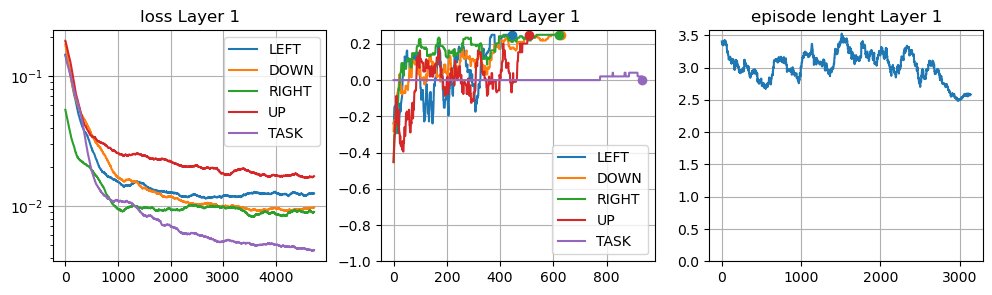

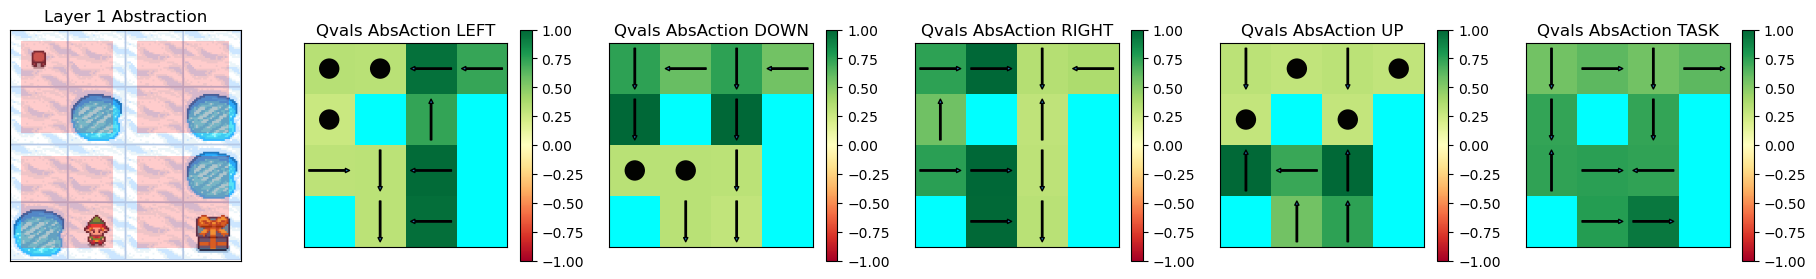

In [ ]:
#plot results and save
utils_plot.plot_mango_loss_reward(mango_agent, save_path=dir_path + f"/mango_agent_training.png")
frozen_lake.plot_utils.plot_all_qvals(mango_agent, save_path=dir_path + f"/mango_agent_qvals.png")
utils_save.save_to_file(path=dir_path + f"/mango_agent.pickle", obj=mango_agent)